### Importing all the necessary libraries

In [1]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

import pickle5 as pickle

### Exploratory Data Analysis (EDA) 

For the EDA process, we will be firstly looking into the dataset and exploring it. We will be looking into the data types, null/NaN columns, duplicate rows after that we will look in the categorical and numerical variables sepeartely. 

For the categorial columns we will be looking into the countplot which gives us the distribution of the categories. 

For the numerical variables, we will be looking into the descriptive analysis, distribution through histogram, outliers using boxplot and the coorealtion using the heatmap.

In [2]:
credit = pd.read_excel("german_credit_data.xlsx")
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
print(f'The total number of rows in our dataset is {credit.shape[0]}.')
print(f'The total number of columns in our dataset is {credit.shape[1]}. They are: {credit.columns.values}.')

The total number of rows in our dataset is 1000.
The total number of columns in our dataset is 10. They are: ['Age' 'Sex' 'Job' 'Housing' 'Saving accounts' 'Checking account'
 'Credit amount' 'Duration' 'Purpose' 'Risk'].


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
credit.duplicated().sum()

0

We will be renaming the columns to remove the white spaces.

In [7]:
credit.rename(columns={"Saving accounts": "Saving_Accounts", "Checking account": "Checking_Account","Credit amount":"Credit_Amount"},inplace=True)
credit

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


### About the Dataset:

The above dataset is of German Credit dataset which has been prepared by Prof. Hofmaan. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. We have 1000 rows and 10 columns in the dataset. Brief discription of the columns in the dataset:

>**1. Age (numerical):** Age of the person who took a credit for the bank.

>**2. Sex (categorical/object):** Sex of the person taking the credit. (male, female)

>**3. Job (ordinal/numeric):** Job of the person. Each number represent specific type of job: (0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

>**4. Housing (categorical/object):** Type of housing they stay at (own, rent, or free)

>**5. Saving accounts (categorical/object):** How much money they have in savings (little, moderate, quite rich, rich)

>**6. Checking account (categorical/object, in DM):** Money in the saving account. The amount is in Deutsch Mark (DM). (little, moderate, rich) 

>**7. Credit amount (numeric, in DM):** Credit amount taken form the bank.

>**8. Duration (numeric, in month):** For how long the credit was taken for.

>**9. Purpose (categorical/object):** What was the reason the credit was taken for (car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

>**10. Risk (Categorical/Object):**  How much risk is associated with each customer. (Good or Bad Risk)


So, we have 6 categorical variables and 4 numerical variable in which the Job being a numerical variable is also an ordinal variable meaning the numbers have some specific meaning associated with it. They can also be converted to categorical variable.

The dataset does have some null values and we need to handle them. The null values data points cannot be removed as we only have 1000 rows in our dataset. So, we will be creating a different  categories for them i.e. not provided. Since, the saving account and checking account has very important in classifing the customers, we cannot impute any values so for that reason we have created a new category called `not provided`. 

And we don't have any duplicate values in our dataset.

In [8]:
credit['Saving_Accounts'] = credit['Saving_Accounts'].fillna('not provided')
credit['Checking_Account'] = credit['Checking_Account'].fillna('not provided')

In [9]:
credit.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving_Accounts     0
Checking_Account    0
Credit_Amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

So, we have successfully have replaced all the NaN/null values with `not provied` and the dataset is clean now. Before going any forward, we will be doing the EDA by dividing the orginal dataset into two parts, i.e. categorical and numerical. 

In [10]:
credit_cat = credit.drop(['Age', 'Job', 'Credit_Amount', 'Duration'], axis = 1)
credit_cat

,Sex,Housing,Saving_Accounts,Checking_Account,Purpose,Risk
0,male,own,not provided,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,not provided,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,not provided,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,not provided,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [11]:
credit_num = credit[['Age', 'Job', 'Credit_Amount', 'Duration']]
credit_num

,Age,Job,Credit_Amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


Lets see the **categorial** table distribution throught the countplot.

### Countplot to explore the categorical variables

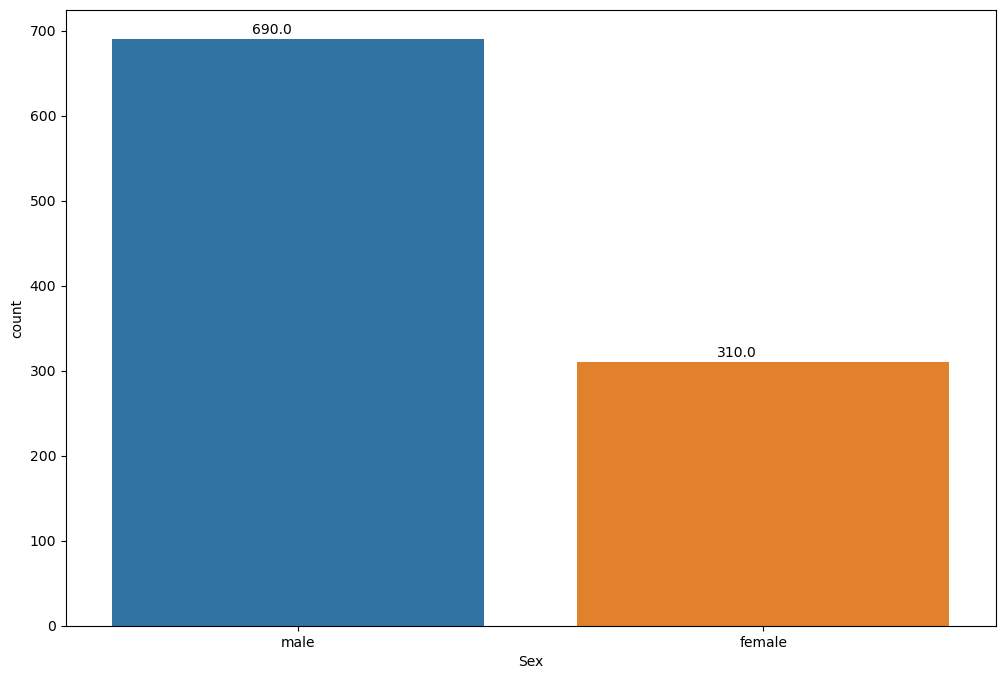

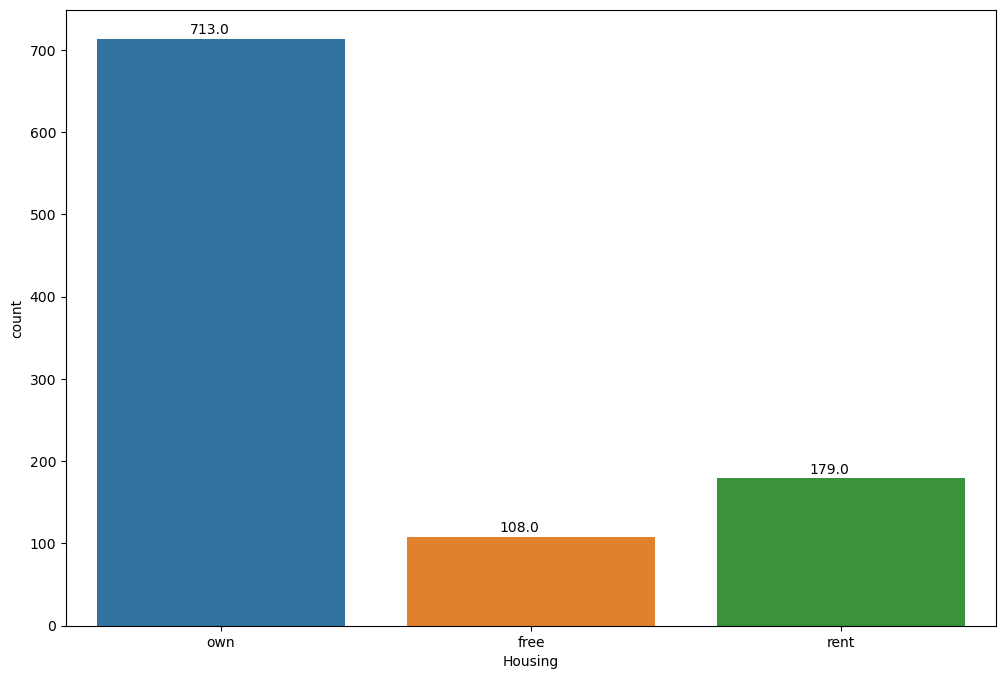

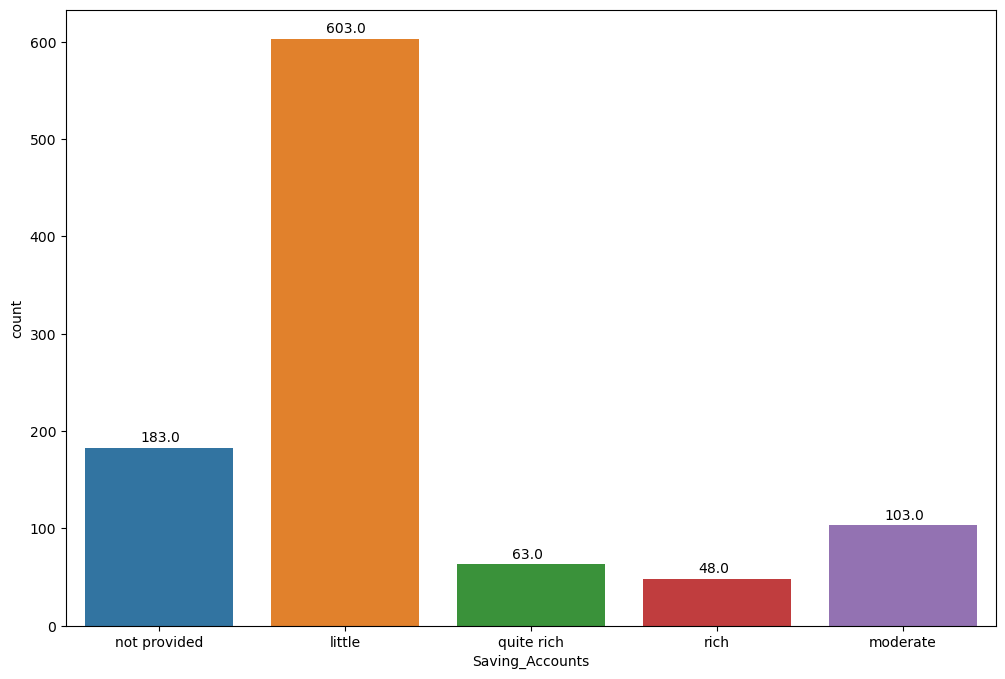

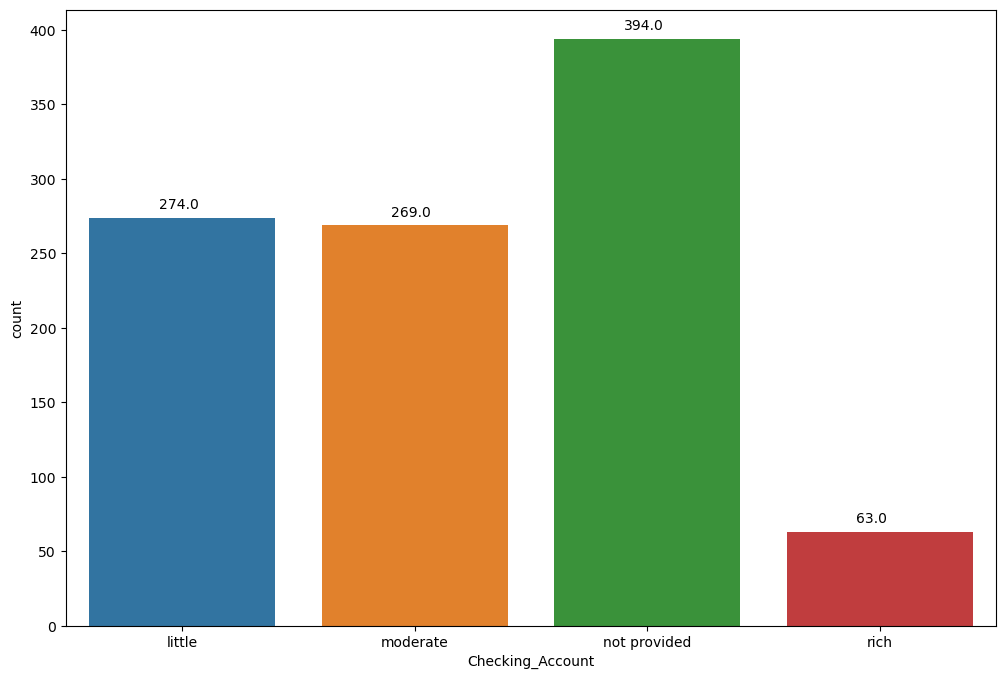

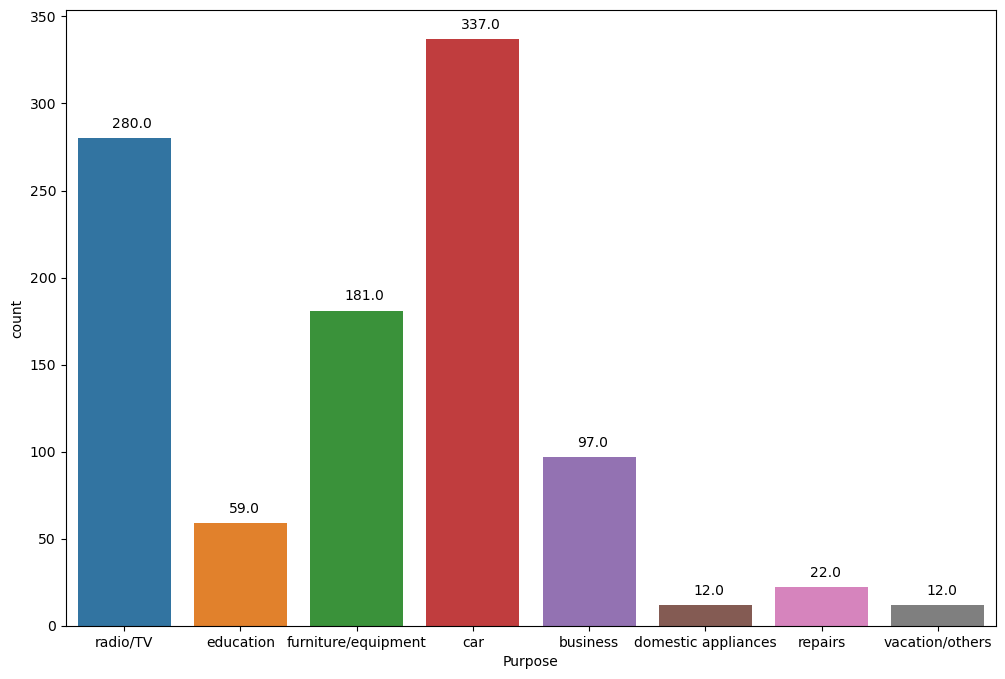

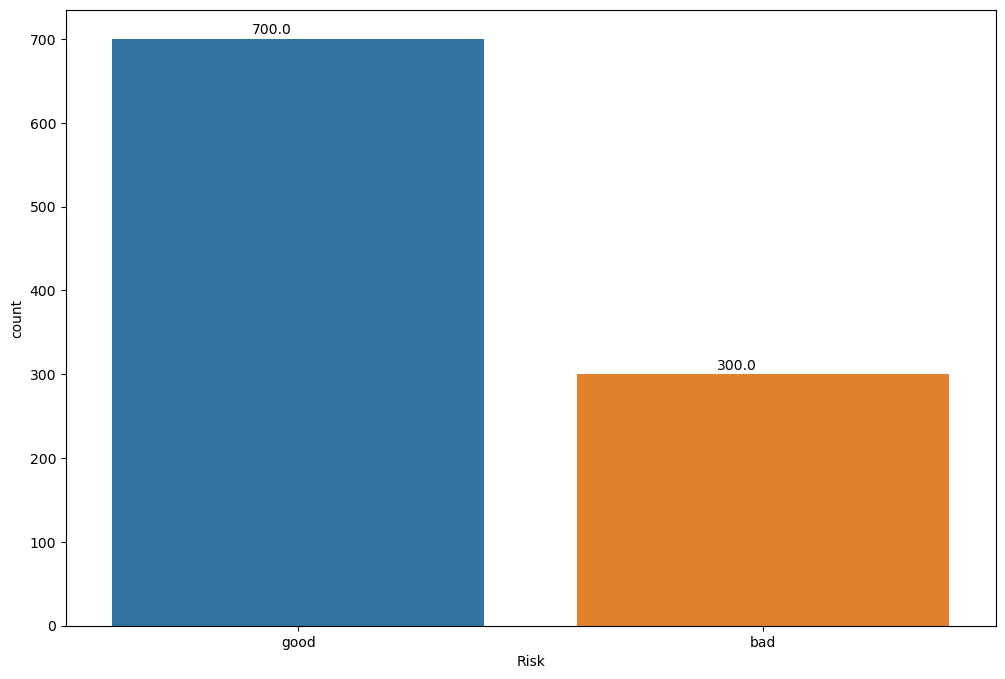

In [12]:
for i in range(len(credit_cat.columns)):
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=credit_cat.columns[i], data=credit_cat)
    
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+6))
    
    plt.show()

About 70% of credit was given to male. Most of the creditors have their own house and about 60% of the applicant have little in their saving account while they have little to moderate amount of saving in their checking account. The main reason for taking the credit seems to be for car and radio/TV and of them about 70% of credit is good and 30% credit is bad. 

Before going any further, we have to change these categorical variable into numerial as machine learning models only accept numerical data. So, for this we will be using OneHotEncoder from sklearn library. We will be using one extra parameter called drop which will drop all the first column of each categories.This is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear regression model.

Also, we will me taking out our target variable which is Risk and we will be mapping it separately. We have mapped Good as 0 and 1 as bad risk.

In [13]:
y = credit_cat['Risk']
y[y=='good'] = 0
y[y=='bad'] = 1
y = y.astype(float)
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    1.0
999    0.0
Name: Risk, Length: 1000, dtype: float64

In [14]:
credit_cat.drop('Risk',inplace=True,axis = 1)
credit_cat

,Sex,Housing,Saving_Accounts,Checking_Account,Purpose
0,male,own,not provided,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,not provided,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,not provided,furniture/equipment
996,male,own,little,little,car
997,male,own,little,not provided,radio/TV
998,male,free,little,little,radio/TV


In [15]:
enc = OneHotEncoder(drop='first',handle_unknown="ignore")

encoding = enc.fit_transform(credit_cat)

In [16]:
enc.n_features_in_

5

In [17]:
enc.feature_names_in_

array(['Sex', 'Housing', 'Saving_Accounts', 'Checking_Account', 'Purpose'],
      dtype=object)

In [18]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['free', 'own', 'rent'], dtype=object),
 array(['little', 'moderate', 'not provided', 'quite rich', 'rich'],
       dtype=object),
 array(['little', 'moderate', 'not provided', 'rich'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object)]

In [19]:
filename = 'OneHotEncoding_Encoding.pkl'

pickle.dump(enc,open(filename,'wb'))

These attributes will be useful for us when we will be implementing them in our app. Also, we are saving the encoding file for future use when we will be deploying the model.

Here, we have changed all the categorical variables to numeric and is ready to send in the machine learning model.

In [20]:
enc_data = pd.DataFrame(encoding.toarray(),columns=enc.get_feature_names())
enc_data

,x0_male,x1_own,x1_rent,x2_moderate,x2_not provided,x2_quite rich,x2_rich,x3_moderate,x3_not provided,x3_rich,x4_car,x4_domestic appliances,x4_education,x4_furniture/equipment,x4_radio/TV,x4_repairs,x4_vacation/others
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now, we have 17 onehotencoded columns.

### Exploring the Numerical Columns:

Now lets see what numerical columns tells us about the dataset. First, we will be looking in a simple discription analysis of the dataset, followed by that we will look into the heatmap of them to see if their is some relationship between the variables and after the heatmap we will be looking into the distribution and outliers of the dataset.

In [26]:
credit_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit_Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


Here, we can see that, the credit amount has a lot of variation in the dataset which means this might have a lot of outliers. Other numerical data seems to have good range of variation.

In [27]:
df = credit.corr(method='pearson')
df.style.background_gradient(cmap='RdBu_r')

,Age,Job,Credit_Amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit_Amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


From the heatmap, we can see that, their is strong positive coorealtion with credit amount and duration which seems to be logical because if we have large credit amount we need longer time to pay that credit. We can also observe, age is not strongly coorealted with any of the variables while job is some what corealted with credit amount and duration not strongly like credit amount and duration.

Now, lets see the distribution of the dataset. If the distribution is highly skeweed then we will be transforming the dataset using Box-Cox Power Transformation

### Distribution of the Dataset:

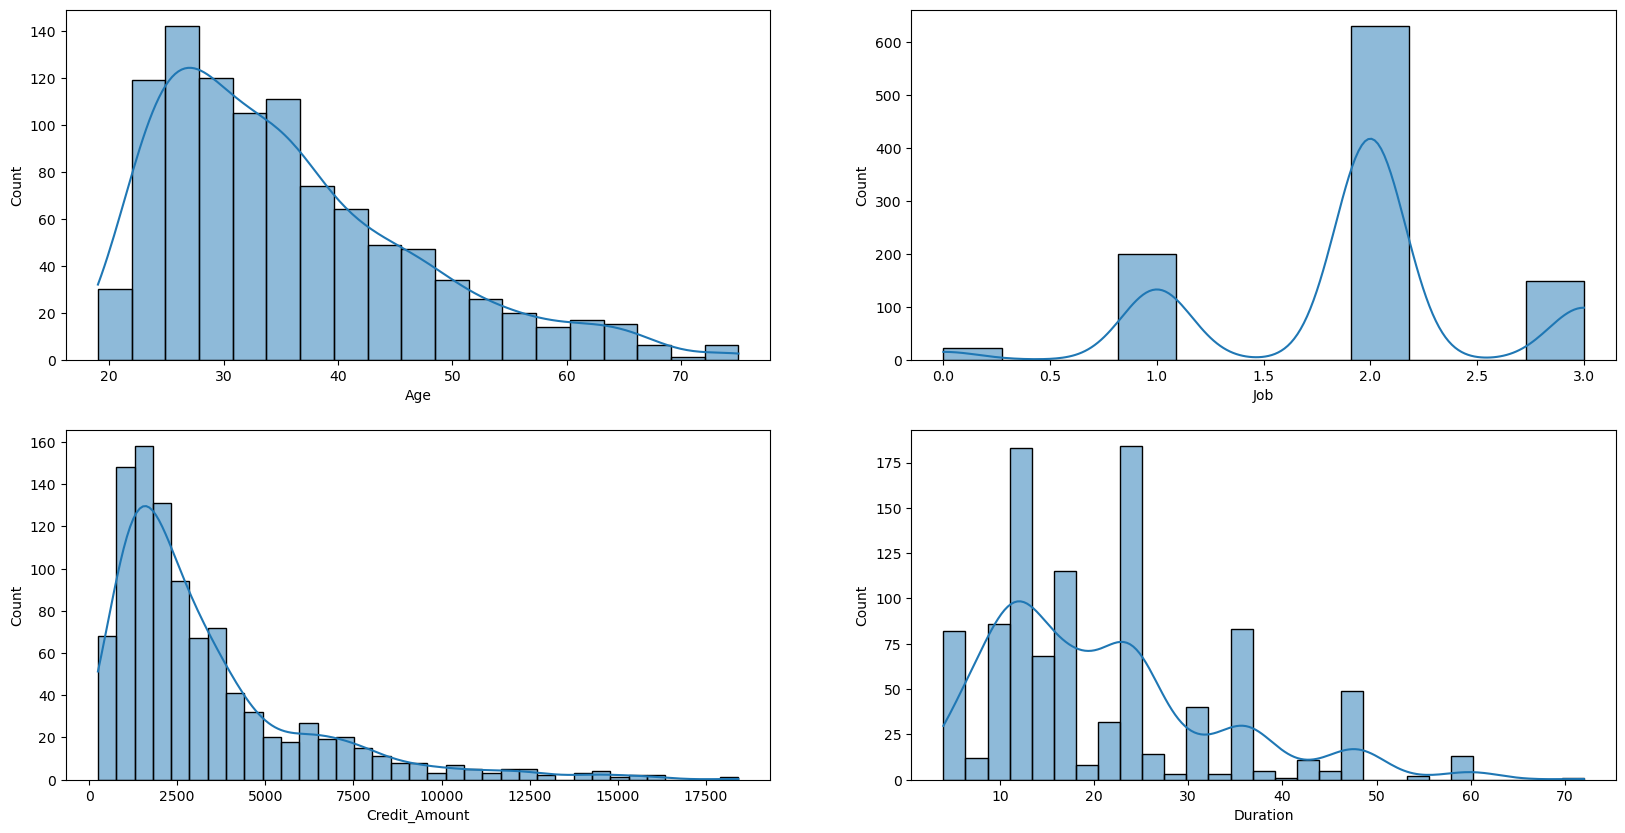

In [28]:
count = 0
credit_cols = credit_num.columns

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=credit_num,x = credit_cols[count],kde=True,ax=ax[i][j])
        count +=1

We can see that, the variables are highly left skeweed except the job variable so we don't have to do any kind of transformation on that.

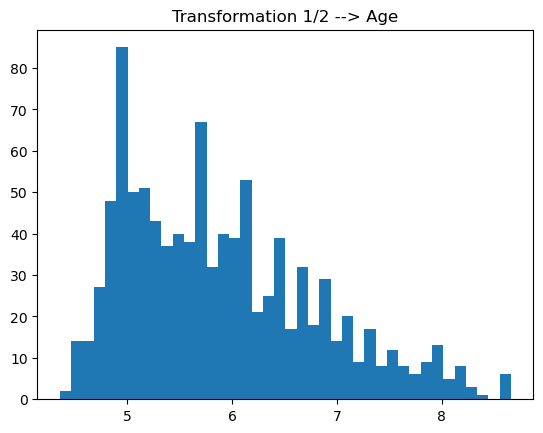

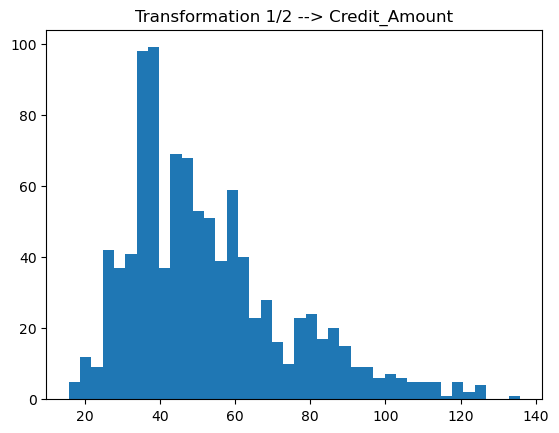

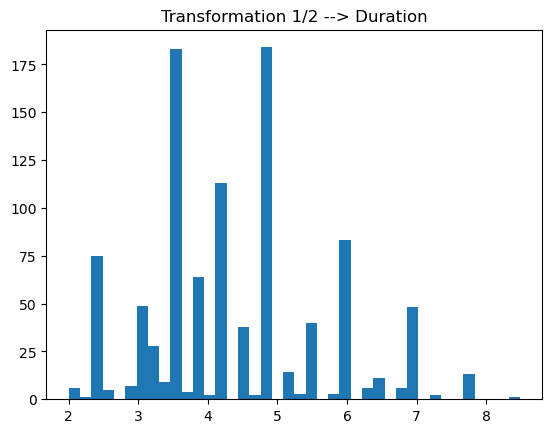

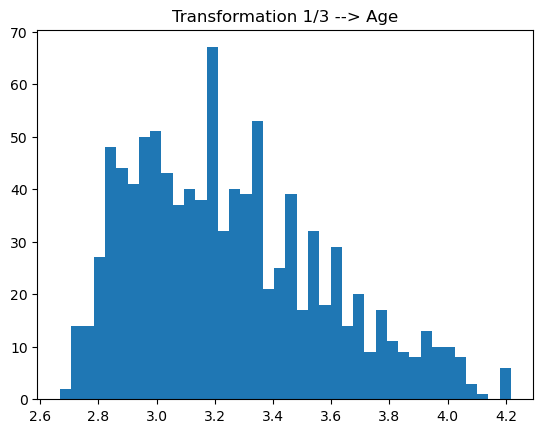

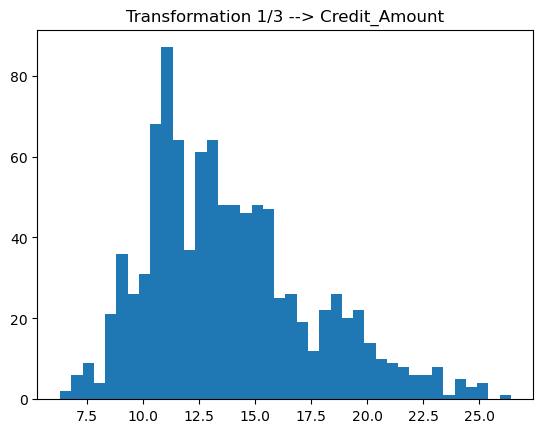

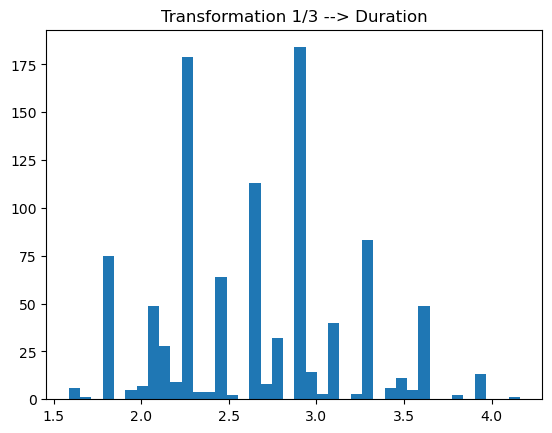

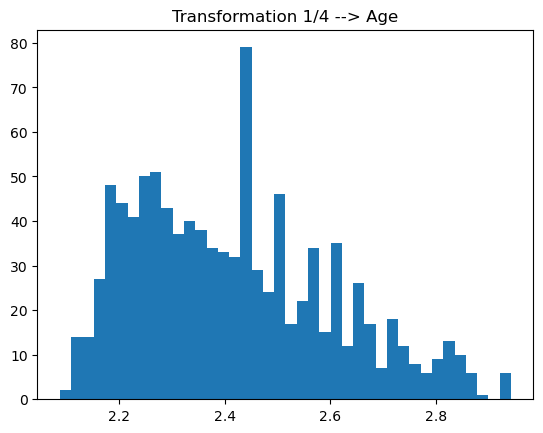

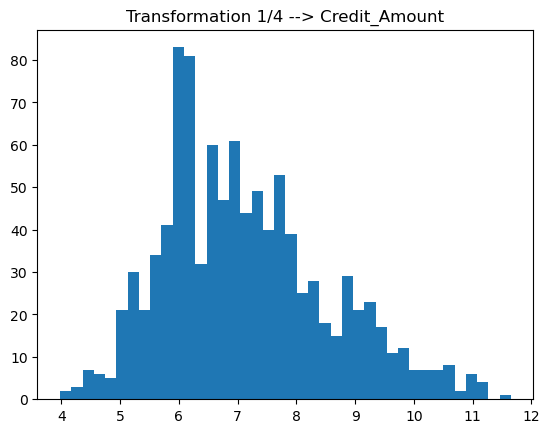

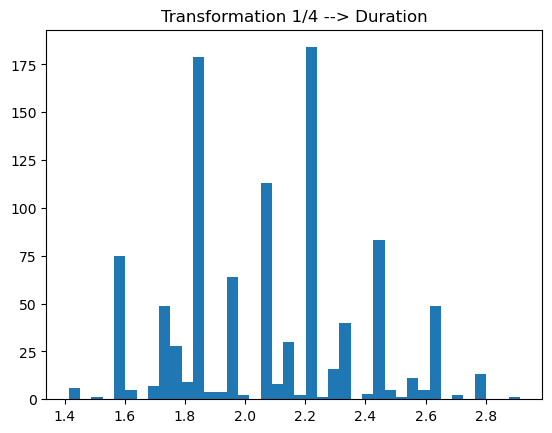

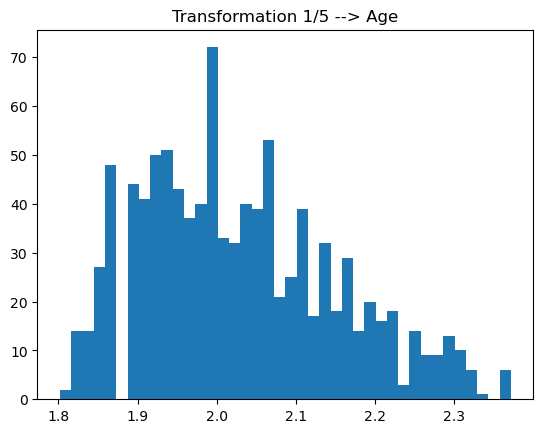

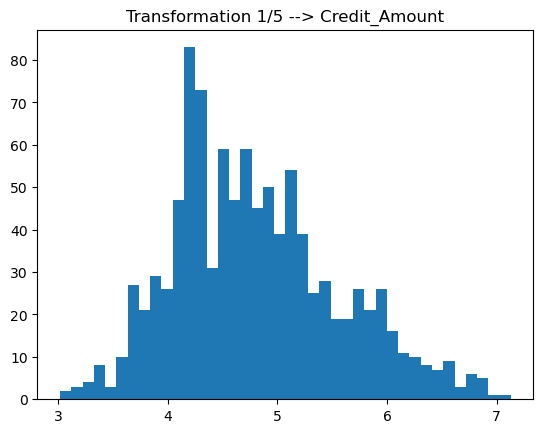

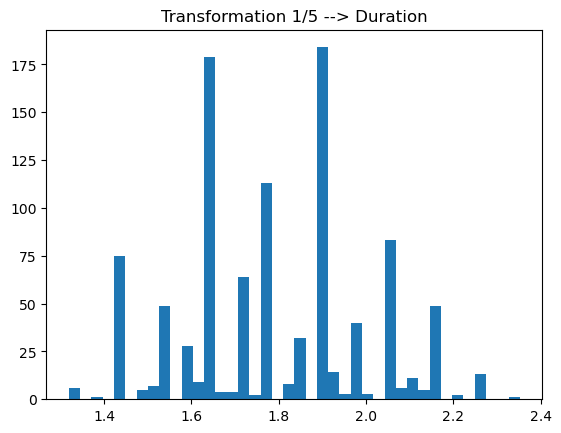

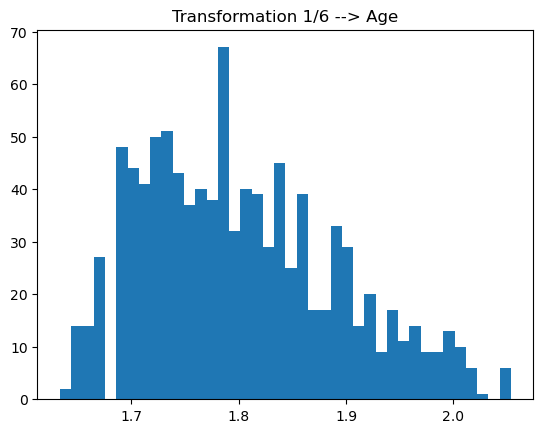

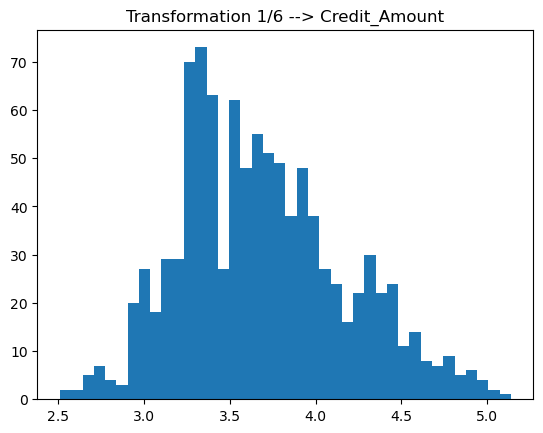

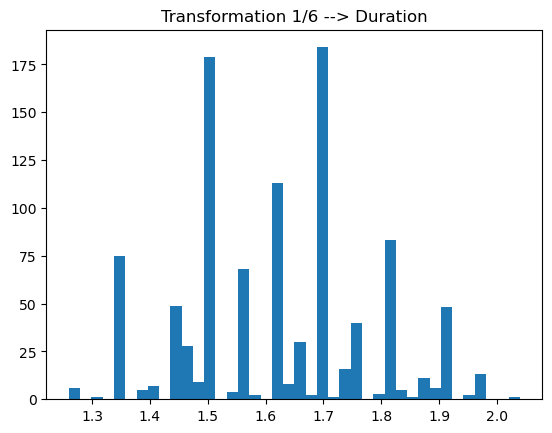

In [29]:
for i in [2,3,4,5,6]:
    for j in ['Age', 'Credit_Amount', 'Duration']:
        plt.hist(credit_num[j]**(1/i), bins=40)
        plt.title("Transformation 1/{} --> {}".format(str(i), j))
        plt.show()
            

The transformation of 1/5 seems to give us the best result. After 1/5, the distribution looks the same so we will be using 1/5 to transform our data.

In [30]:
for j in ['Age', 'Credit_Amount', 'Duration']:
    credit_num[j] = credit_num[j]**(1/5)

In [31]:
credit_num

,Age,Job,Credit_Amount,Duration
0,2.318542,2,4.107361,1.430969
1,1.855601,2,5.687455,2.168944
2,2.177906,1,4.616132,1.643752
3,2.141127,2,6.016270,2.111786
4,2.212357,2,5.463938,1.888175
...,...,...,...,...
995,1.987341,1,4.445391,1.643752
996,2.091279,3,5.214947,1.974350
997,2.069935,2,3.811108,1.643752
998,1.872171,2,4.499863,2.141127


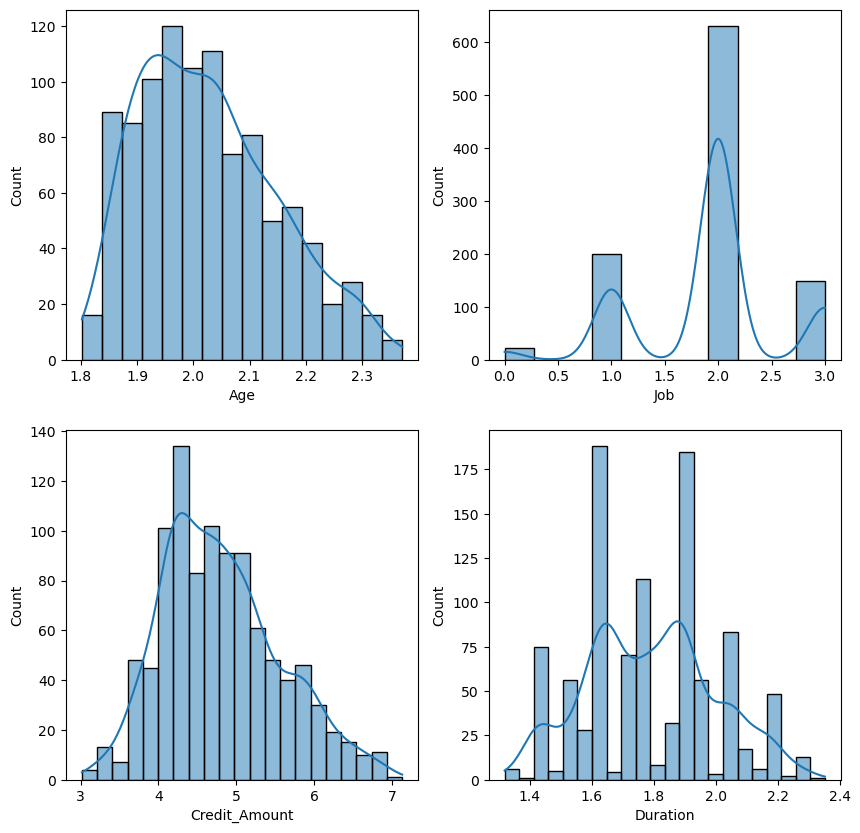

In [32]:
count = 0
credit_cols = credit_num.columns

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=credit_num,x = credit_cols[count],ax=ax[i][j],kde=True)
        count +=1

So, we have our numerical columns with proper distribution. Now lets see, if we have any outliers after transformation.

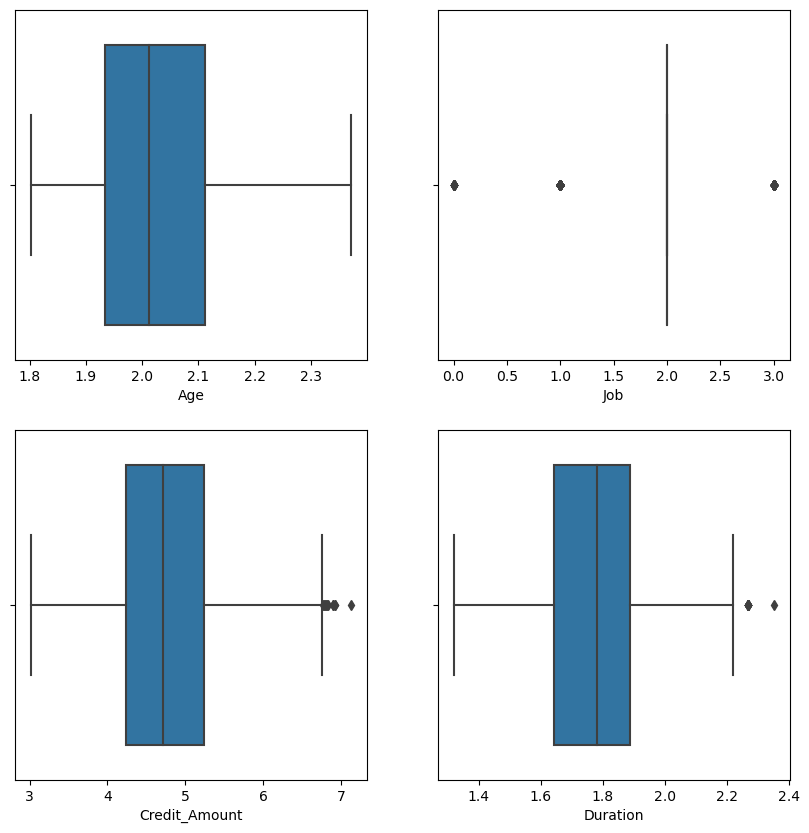

In [33]:
count = 0
credit_cols = credit_num.columns

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data=credit_num,x = credit_cols[count],ax=ax[i][j])
        count +=1

After the transformation, the outliers seems to have greatly reduced and some of the outliers we have can be negleted as some people might have taken huge credit for long duration. 

### Feature Scaling of Numerical Variables:

Feature scaling making all the features standard in relation with each other. Here, we will be using StandardScaler model of Sklearn library. This follows Standard Normal Distribution which makes mean 0 and scales the data to unit variance.

In [34]:
credit_num.head()

,Age,Job,Credit_Amount,Duration
0,2.318542,2,4.107361,1.430969
1,1.855601,2,5.687455,2.168944
2,2.177906,1,4.616132,1.643752
3,2.141127,2,6.016270,2.111786
4,2.212357,2,5.463938,1.888175


In [35]:
scaler = StandardScaler()
credit_num_standard = pd.DataFrame(scaler.fit_transform(credit_num), columns=credit_num.columns)
credit_num_standard.head()

,Age,Job,Credit_Amount,Duration
0,2.368165,0.146949,-0.924144,-1.733490
1,-1.395242,0.146949,1.166102,1.830987
2,1.224891,-1.383771,-0.251110,-0.705732
3,0.925901,0.146949,1.601078,1.554911
4,1.504950,0.146949,0.870420,0.474852


In [36]:
#saving the standardscaler model

filename = 'final_trained_scaler_model.pkl'

pickle.dump(scaler,open(filename,'wb'))

### Implementing KFOLD CV and using Random Forest Classifier

Here, we will be implementing kfold cross-validation with random forest classifier and will be discussing the results we get. After the kfold we will be implementing gridsearchcv to optimize the result we get. 

Initally we need to join the enc_data and credit_num_standard into one to get the feature variable and we alread have the target variable which is y.

In [37]:
X = enc_data.join(credit_num_standard)
X

,x0_male,x1_own,x1_rent,x2_moderate,x2_not provided,x2_quite rich,x2_rich,x3_moderate,x3_not provided,x3_rich,...,x4_domestic appliances,x4_education,x4_furniture/equipment,x4_radio/TV,x4_repairs,x4_vacation/others,Age,Job,Credit_Amount,Duration
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.368165,0.146949,-0.924144,-1.733490
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.395242,0.146949,1.166102,1.830987
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.224891,-1.383771,-0.251110,-0.705732
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.925901,0.146949,1.601078,1.554911
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.504950,0.146949,0.870420,0.474852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.324282,-1.383771,-0.476978,-0.705732
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.520668,1.677670,0.541039,0.891087
997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.347155,0.146949,-1.316047,-0.705732
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.260535,0.146949,-0.404919,1.696633


### Performing KFOLD CV

Before performing applying any classification algorithm, we need to split the dataset into training and testing dataset. We use the training dataset to train the model and testing dataset to test our model for unseen data. We do this to see if the model can generalize unseen data or the model is overfitting.

In [39]:
# splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state =111)

In [40]:
rf = RandomForestClassifier(random_state =111)

We can pass the X and y values directly but to make the baseline and gridsearch accuracy compareable we are passing the X_train and y_train in place of X and y.

In [41]:
cv = StratifiedKFold(n_splits=5)

scores_rf = cross_val_score(rf, X_train.values, y_train.values, cv=cv,error_score="raise")

print("The average cross validation score for Linear Regression: ",scores_rf.mean())
print()
print("Cross validation scores:",scores_rf)

The average cross validation score for Linear Regression:  0.7166666666666667

Cross validation scores: [0.73333333 0.70555556 0.72222222 0.71666667 0.70555556]


Here, without any hyperparameter optimization, we got a baseline score of 0.71 accuracy using kfold cross-validation. Now, we will try to optimize our model and see the result.

In [42]:
def print_results(score):

    means = score.cv_results_['mean_test_score']
    sd = score.cv_results_['std_test_score']
    
    print('Score: {} \n BEST PARAMS: {}\n \n'.format(round(score.best_score_,5),score.best_params_))

    
    for mean, std, params in zip(means, sd, score.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [43]:
parameters = {
    'n_estimators': [25,50,100,150],
    'max_depth': [25, 32, 50, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = GridSearchCV(rf, parameters, cv=cv, n_jobs=-1)
rf_model.fit(X_train, y_train)

print_results(rf_model)

Score: 0.72889 
 BEST PARAMS: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
 

0.712 (+/-0.05) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
0.726 (+/-0.034) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.714 (+/-0.024) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.719 (+/-0.026) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.704 (+/-0.061) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
0.717 (+/-0.058) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.717 (+/-0.051) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.719 (+/-0.029) for {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.721 (+/-0.042) for {'max_dept

After the hyperparameter optimization, we got an accuracy of 0.72 which is a slight improvement in our model. It does not seems much but in a high business setting, it is huge improvement. Now, testing the model which unseen data helps us to see if the model is able to generalize them and give us good accuaracy. 

In [44]:
rf_model_final = rf_model.best_estimator_
rf_model_final

RandomForestClassifier(max_depth=32, n_estimators=50, random_state=111)

In [45]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 4)
    precision = round(precision_score(labels, pred), 4)
    recall = round(recall_score(labels, pred ), 4)
    confusion_m = confusion_matrix(labels, pred)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    print('\n')
    print(confusion_m)
    print('\n')
    print(classification_report(labels,pred))

In [46]:
evaluate_model('Random Forest Classifier', rf_model_final, X_test, y_test)

Random Forest Classifier -- Accuracy: 0.8 / Precision: 0.7273 / Recall: 0.5333 / Latency: 12.0ms


[[64  6]
 [14 16]]


              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        70
         1.0       0.73      0.53      0.62        30

    accuracy                           0.80       100
   macro avg       0.77      0.72      0.74       100
weighted avg       0.79      0.80      0.79       100



Here, in the testing data, we got a good score of accuracy of 0.8 and precision of 0.72. However, we are not able to get good recall value. We got only 0.53 for recall value. A system with high precision but low recall returns very few results, but most of its predicted labels are correct when compared to the training labels. The low recall means the model was not able to properly predict the False Negative which we can see in the confusion matrix. We got 14 False Negative which were classified as 1 but were 0. The low recall can also be because of imbalance dataset as we have seen 70% of target labels were good while only 30% of target labels were bad.

## Saving the Model:

In [48]:
filename = 'final_trained_model.pkl'

pickle.dump(rf_model_final,open(filename,'wb'))